# FYS-STK4155 - Project 1

## By Jørn Marcus Høylo Rosenberg and Andreas Dyve

This Notebook contains both the code for the project and the report. The notebook is structured with each exercise in its own cell(s). This leads to some repeting code, but is practical for the purpose of evaluating each task seperately. (eller noe i denne duren?)

### Table of Contents

* [1. Imported libraries](#imports)
* [2. Functions used throughout the project](#functions)
    * [2.1. Franke function](#frankefunction)
    * [2.2. Cost functions](#costfunctions) 
    * [2.3. Design matrix function](#Xfunction)
    * [2.4. Scaling function](#scalefunction)
* [3. Exercise 1](#1)
    * [3.1. Code](#1.1)
    * [3.2. Discussions](#1.2)
* [4. Exercise 2](#2)
* [5. Exercise 3](#3)
* [6. Exercise 4](#4)
* [7. Exercise 5](#5)

### 1. Imported libraries <a class="anchor" id="imports"></a>

In [5]:
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.utils import resample

### 2. Functions used throughout the project <a class="anchor" id="functions"></a>

#### 2.1. Error functions <a class="anchor" id="errorfunctions"></a>

In [6]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#### 2.2. Franke function <a class="anchor" id="frankefunction"></a>

The provided code in the exercise set is used for making and plotting of the Franke function.

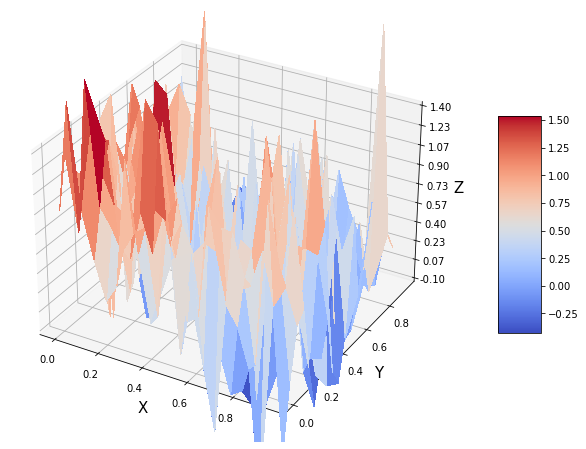

In [299]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0,0.5,x.shape)
    return term1 + term2 + term3 + term4 + noise


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('Z', fontsize=15)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### 2.3. Design matrix function <a class="anchor" id="Xfunction"></a>

The provided code is used for computing the design matrix

In [8]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of columns in beta
    X = np.ones((N,l)) 

    for i in range(1,n+1):
        q = int((i)*(i+1)/2) 
        for k in range(i+1): 
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

#### 2.4. Scaling function <a class="anchor" id="scalefunction"></a>

In [302]:
def scale(X_train, X_test, z_train, z_test):
    scaler = StandardScaler() # Utilizing scikit's standardscaler

    scaler_x = scaler.fit(X_train) # Scaling x-data
    X_train_scaled = scaler_x.transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)

    scaler_z = scaler.fit(z_train.reshape(-1,1)) # Scaling z-data
    z_train_scaled = scaler_z.transform(z_train.reshape(-1,1)).ravel()
    z_test_scaled = scaler_z.transform(z_test.reshape(-1,1)).ravel()

    return X_train_scaled, X_test_scaled, z_train_scaled, z_test_scaled

### Exercise 1: OLS on the Franke function <a class="anchor" id="1"></a>

#### Notes on scaling:
- Without noise, x and y is between 0 and 1
- The function does not vary very much (without noise)
- Recomendation from Morten: Do it yourself. Take design matrix and subtract the mean values, before or after train-test-split
- Scale y as well, y -> y - mean(y), $\beta_0$ = mean(y)

#### Results 
- As expected, scaling does not make any significant difference on the mse and $r^2$
- MSE error with noise (mean=0, sigma=1) and N=1000 shrinks from 1.025 to 1 for both test and train
- MSE error without noise and N=1000 shrinks from 0.0225 to 0.0025 for both test and train
- Using low N (~10) can give increased test error, but becomes random each time

#### OLS regression with polynomial degree 1-5

Degree: 0   mse train: 0.332124   mse test: 0.332307   r2_train: 0.000000   r2 test: -0.000034
Degree: 1   mse train: 0.272303   mse test: 0.271555   r2_train: 0.179941   r2 test: 0.183505
Degree: 2   mse train: 0.266814   mse test: 0.265148   r2_train: 0.197772   r2 test: 0.197553
Degree: 3   mse train: 0.256973   mse test: 0.260050   r2_train: 0.225423   r2 test: 0.220840
Degree: 4   mse train: 0.253764   mse test: 0.253314   r2_train: 0.236396   r2 test: 0.235869
Degree: 5   mse train: 0.252014   mse test: 0.251178   r2_train: 0.241601   r2 test: 0.242557


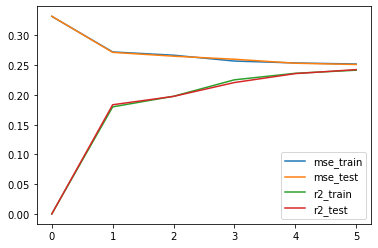

In [314]:
# Making meshgrid of datapoints and compute Franke's function
maxdegrees = 5
N = 500
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat)

polydegree = np.zeros(maxdegrees+1)
r2_train = np.zeros(maxdegrees+1)
r2_test = np.zeros(maxdegrees+1)
mse_train = np.zeros(maxdegrees+1)
mse_test = np.zeros(maxdegrees+1)

# OLS regression for polynomials from 0 to maxdegrees
for i in range(maxdegrees+1):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    #X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
    
    # prediction
    betaOLS = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    ztilde_train = X_train @ betaOLS
    ztilde_test = X_test @ betaOLS
    
    # cost functions
    r2_train[i] = r2_score(z_train, ztilde_train)
    r2_test[i] = r2_score(z_test, ztilde_test)
    mse_train[i] = MSE(z_train,ztilde_train) 
    mse_test[i] = MSE(z_test,ztilde_test) #mean_squared_error(z_test, ztilde_test)
    print('Degree: %i   mse train: %.6f   mse test: %.6f   r2_train: %.6f   r2 test: %.6f'\
          %(degree, mse_train[i], mse_test[i], r2_train[i], r2_test[i]))

plt.plot(polydegree, mse_train, label='mse_train')
plt.plot(polydegree, mse_test, label='mse_test')
plt.plot(polydegree, r2_train, label='r2_train')
plt.plot(polydegree, r2_test, label='r2_test')
plt.legend()
plt.show()

#### Make confidence intervals
- $\mu_{\beta} \pm \frac{2\sigma_{\beta}}{\sqrt{n}}$

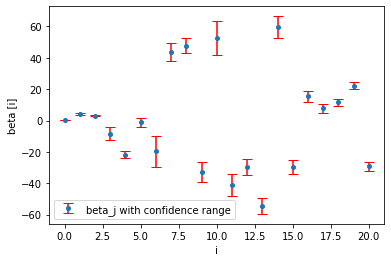

,Beta,+-
0,0.555488,0.058823
1,4.103633,0.775424
2,3.122444,0.547996
3,-8.354188,4.050991
4,-21.805718,2.307614
5,-1.243826,2.664445
6,-19.661471,9.755445
7,43.740228,5.614364
8,47.742183,4.701250
9,-32.735881,6.185533


In [272]:
variance = np.zeros(len(betaOLS))
CI = np.zeros(len(betaOLS))

for i in range(len(betaOLS)):
    variance[i] = 0.1**2 * np.linalg.pinv(X_train.T @ X_train)[i,i]
    CI[i] = 2*np.sqrt(variance[i])/np.sqrt(N)

plt.errorbar(np.arange(0,len(betaOLS)), betaOLS, yerr=CI, fmt='o', ecolor='red', capsize=5, markersize=4, label='beta_j with confidence range')
plt.xlabel('i')
plt.ylabel('beta [i]')
plt.legend()
plt.show()

table = pd.DataFrame({'Beta': betaOLS, '+-': CI})
table

### Exercise 2 - Bias-variance trade-off and resampling techniques 
<a class="anchor" id="2"></a>

#### Notes
- scaling or not scaling - no difference as expected (ref notes exercise 1)
- Increasing from 50 bootstraps gives no improved results
- Increasing N from 100 only smoothens the curve
- Polynomial degree above 10 does not decrease errors

#### OLS regression with bootstrap 

1.0325752003949362
0.467865093189798
0.4125396862920006
0.347535412020692
0.32593296100269425
0.3581780322806616
0.417489979978341
0.7634757514978708
2.093737773012761


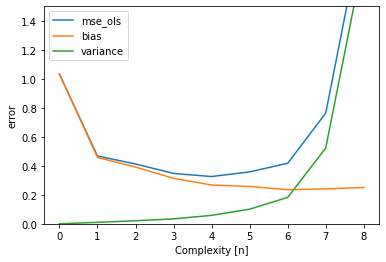

In [228]:
N = 100
n_bootstraps = 1000
maxdegree = 9
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

polydegree = np.zeros(maxdegree)
mse_error = np.zeros(maxdegree)
r2_error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
mse_est = np.zeros(maxdegree)

z = FrankeFunction(x_flat, y_flat)
#z = z - np.mean(z)
scaler = StandardScaler()
for i in range(maxdegree):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)

    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    scaler_x = scaler.fit(X_train)
    X_train = scaler_x.transform(X_train)
    X_test = scaler_x.transform(X_test)
    
    scaler_z = scaler.fit(z_train.reshape(-1,1))
    z_train = scaler_z.transform(z_train.reshape(-1,1)).ravel()
    z_test = scaler.transform(z_test.reshape(-1,1)).ravel()
    

    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train, z_train, n_samples=100)
        beta_ols = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        z_pred[:,j] = X_test @ beta_ols
    
    mse_error[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred, axis=1, keepdims=True))**2)
    variance[i] = np.mean(np.var(z_pred, axis=1, keepdims=True))
    print(mse_error[i])
    
plt.plot(polydegree, mse_error, label='mse_ols')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='variance')
plt.xlabel('Complexity [n]')
plt.ylabel('error')
plt.ylim(0,1.5)
plt.legend()
plt.show()

#### Discussion on bias-variance trade-off

- Varier polynomgrad n, punkter N og antall bootstraps n_bootstraps og diskuter forskjellene


### Exercise 3 - cross validation as resampling technique, adding more complexity 
<a class="anchor" id="3"></a>

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

N = 100
degree = 5
k = 10
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)
mse_scores = []

z = FrankeFunction(x_flat, y_flat)
#z = z - np.mean(z)
X = create_X(x_flat, y_flat, degree)
#X = X - np.mean(X)

kfold = KFold(n_splits = k, shuffle=True)

for train_indexes, test_indexes in kfold.split(X):
    #print(train_indexes)

    X_train = X[train_indexes]
    X_test = X[test_indexes]
    z_train = z[train_indexes]
    z_test = z[test_indexes]

    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred = X_test @ beta
    mse_scores.append(mean_squared_error(z_test, z_pred))

print(mse_scores)

print(np.mean(mse_scores))

[0.02568571967240019, 0.0238028671151898, 0.025057881669536316, 0.02411680253419607, 0.024140337700135076, 0.023813572833604035, 0.023450794457555057, 0.023216425429540864, 0.02631152551577467, 0.025307514928751128]
0.02449034418566832


#### CV with scikit cross_val_score

In [174]:
linreg = LinearRegression()
mse_scikit_linreg = cross_val_score(linreg, X, z, scoring='neg_mean_squared_error', cv=kfold)


print(np.mean(mse_scikit_linreg))

-0.024464437844554574


### Exercise 4 - Ridge regression on the Franke function with resampling
<a class="anchor" id="4"></a>

- Ridge: Shrinking beta-coefficients with large variance, but never to zero
- Lasso: Same, but can shrink to zero
- Noisy function means large variance
- To compare OLS/ridge/beta, try to compute coefficients and see with/without noise
- Beta coefficients in ridge are given by Gaussian distribution, in Lasso they are given by Laplace distribution (thats why they can go to zero)

- Scaling: Subtracting the mean value means first column of design matrix (1,1,1,...) becomes zero.

Degree: 0    lambda: 1.0000    mse_ridge: 1.0125    mse_ols: 1.0125
Degree: 1    lambda: 1.0000    mse_ridge: 0.8451    mse_ols: 0.8451
Degree: 2    lambda: 1.0000    mse_ridge: 0.8557    mse_ols: 0.8548
Degree: 3    lambda: 1.0000    mse_ridge: 0.8264    mse_ols: 0.8421
Degree: 4    lambda: 1.0000    mse_ridge: 0.8232    mse_ols: 0.8306
Degree: 5    lambda: 1.0000    mse_ridge: 0.8635    mse_ols: 0.8356
Degree: 6    lambda: 1.0000    mse_ridge: 0.9050    mse_ols: 0.8291
Degree: 7    lambda: 1.0000    mse_ridge: 0.8654    mse_ols: 0.8350
Degree: 8    lambda: 1.0000    mse_ridge: 7.2009    mse_ols: 0.8218
Degree: 9    lambda: 1.0000    mse_ridge: 1.2820    mse_ols: 0.8322


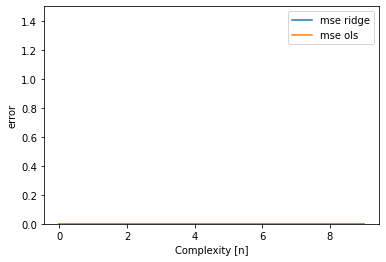

In [277]:
N = 20
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat) 

#Bootstrap parameters
n_bootstraps = 1000
maxdegree = 10

#cross_validation parameters
k = 10

polydegrees = np.zeros(maxdegree)

#Error arrays
mse_error_ridge_bootstrap = np.zeros(maxdegree)
mse_error_ols_bootstrap = np.zeros(maxdegree)

bias_ridge_bootstrap = np.zeros(maxdegree)
bias_ols_bootstrap = np.zeros(maxdegree)

variance_ridge_bootstrap = np.zeros(maxdegree)
variance_ols_bootstrap = np.zeros(maxdegree)

mse_error_ridge_cvd = np.zeros(maxdegree)
mse_error_ols_cvd = np.zeros(maxdegree)

for i in range(maxdegree):
    degree = i
    polydegrees[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    
    scaler_x = scaler.fit(X_train)
    X_train = scaler_x.transform(X_train)
    X_test = scaler_x.transform(X_test)
    
    scaler_z = scaler.fit(z_train.reshape(-1,1))
    z_train = scaler_z.transform(z_train.reshape(-1,1)).ravel()
    z_test = scaler.transform(z_test.reshape(-1,1)).ravel()
    
    z_pred_ridge_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_ols_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    """
    for j in range(n_bootstraps):
        lmd = 1
        x_bs,z_bs = resample(X_train,z_train, n_samples=50)
        beta_ridge_bootstrap = np.linalg.pinv(x_bs.T @ x_bs + lmd*np.eye(x_bs.shape[1],x_bs.shape[1])) @ x_bs.T @ z_bs
        beta_ols_bootstrap = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        z_pred_ridge_bootstrap[:,j] = X_test @ beta_ridge_bootstrap
        z_pred_ols_bootstrap[:,j] = X_test @ beta_ols_bootstrap
    
    #Bootstrap errors
    mse_error_ridge_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge_bootstrap)**2, axis=1, keepdims=True))
    mse_error_ols_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ols_bootstrap)**2, axis=1, keepdims=True))
    
    bias_ridge_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ridge_bootstrap, axis=1, keepdims=True))**2)
    bias_ols_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ols_bootstrap, axis=1, keepdims=True))**2)
    
    variance_ridge_bootstrap[i] = np.mean(np.var(z_pred_ridge_bootstrap, axis=1, keepdims=True))
    variance_ols_bootstrap[i] = np.mean(np.var(z_pred_ols_bootstrap, axis=1, keepdims=True))
    
    print('Degree: %i    lambda: %.4f    mse_ridge: %.4f    mse_ols: %.4f' %(degree, lmb, mse_error_ridge_bootstrap[i], mse_error_ols_bootstrap[i]))
    
    """
    cv_split = 0
    mse_scores_ols_cvd = np.zeros(k)
    mse_scores_ridge_cvd = np.zeros(k)
    
    kfold = KFold(n_splits = k, shuffle=True)
    for train_indexes, test_indexes in kfold.split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        z_train = z[train_indexes]
        z_test = z[test_indexes]
        
        scaler_x = scaler.fit(X_train)
        X_train = scaler_x.transform(X_train)
        X_test = scaler_x.transform(X_test)
    
        scaler_z = scaler.fit(z_train.reshape(-1,1))
        z_train = scaler_z.transform(z_train.reshape(-1,1)).ravel()
        z_test = scaler.transform(z_test.reshape(-1,1)).ravel()
        
        lmd = 1
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        
        beta_ols_cvd = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        beta_ridge_cvd = np.linalg.pinv(X_train.T @ X_train + lmd*I_) @ X_train.T @ z_train
        
        z_pred_ols_cvd = X_test @ beta_ols_cvd
        z_pred_ridge_cvd = X_test @ beta_ridge_cvd
        
        mse_scores_ols_cvd[cv_split] = mean_squared_error(z_test, z_pred_ols_cvd)
        mse_scores_ridge_cvd[cv_split] = mean_squared_error(z_test, z_pred_ridge_cvd)
        
        cv_split += 1
    
    # Cvd errors
    mse_error_ridge_cvd[i] = np.mean(mse_scores_ols_cvd)
    mse_error_ols_cvd[i] = np.mean(mse_scores_ridge_cvd)
    
    print('Degree: %i    lambda: %.4f    mse_ridge: %.4f    mse_ols: %.4f' %(degree, lmb, mse_error_ridge_cvd[i], mse_error_ols_cvd[i]))
    
plt.plot(polydegrees, mse_error_ridge_bootstrap, label='mse ridge')
plt.plot(polydegrees, mse_error_ols_bootstrap, label='mse ols')
#plt.plot(polydegrees, bias, label='bias')
#plt.plot(polydegrees, variance, label='variance')
plt.xlabel('Complexity [n]')
plt.ylabel('error')
plt.ylim(0,1.5)
plt.legend()
plt.show()

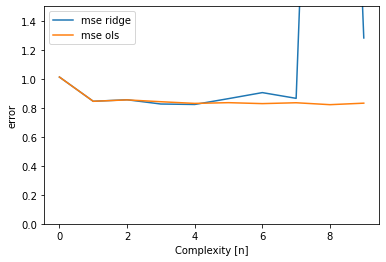

In [279]:
plt.plot(polydegrees, mse_error_ridge_cvd, label='mse ridge')
plt.plot(polydegrees, mse_error_ols_cvd, label='mse ols')
plt.xlabel('Complexity [n]')
plt.ylabel('error')
plt.ylim(0,1.5)
plt.legend()
plt.show()

In [182]:
N = 100
degree = 5
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat)
#z = z - np.mean(z)
X = create_X(x_flat, y_flat, degree)
#X = X - np.mean(X)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)


nlambdas = 100
lambdas = np.logspace(-5, 5, nlambdas)

# Cross-validation
k = 5
kfold = KFold(n_splits = k)
mse_ridge_cv = np.zeros(nlambdas)

# Bootstrap
n_bootstraps = 50
mse_ridge_bs = np.zeros(nlambdas)
bias_bs = np.zeros(nlambdas)
variance_bs = np.zeros(nlambdas)

for i in range(nlambdas):
    lmd = lambdas[i]
    # Cross validation
    mse_cv = []
    for train_indexes, test_indexes in kfold.split(X):
        X_train_cv = X[train_indexes]
        X_test_cv = X[test_indexes]
        z_train_cv = z[train_indexes]
        z_test_cv = z[test_indexes]

        beta_cv = np.linalg.pinv(X_train_cv.T @ X_train_cv + lmd*np.eye(X_train_cv.shape[1], X_train_cv.shape[1])) @ X_train_cv.T @ z_train_cv
        z_pred_cv = X_test_cv @ beta_cv
        mse_cv.append(mean_squared_error(z_test_cv, z_pred_cv))
    mse_ridge_cv[i] = np.mean(mse_cv)
    
    
    # Bootstrap
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train, z_train)
        beta_bs = np.linalg.pinv(x_bs.T @ x_bs + lmd*np.eye(x_bs.shape[1], x_bs.shape[1])) @ x_bs.T @ z_bs
        z_pred_bs = X_test @ beta_bs
    
    mse_ridge_bs[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred)**2, axis=1, keepdims=True))
    bias_bs[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred, axis=1, keepdims=True))**2)
    variance_bs[i] = np.mean(np.var(z_pred, axis=1, keepdims=True))

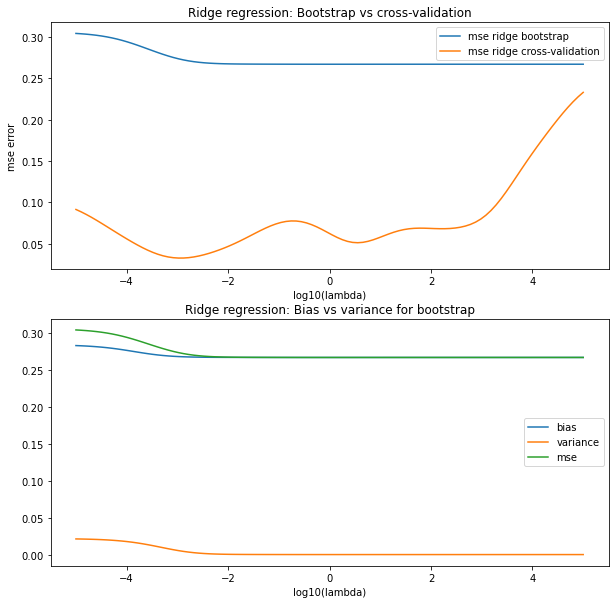

In [184]:
fig,ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(np.log10(lambdas), mse_ridge_bs, label='mse ridge bootstrap')
ax[0].plot(np.log10(lambdas), mse_ridge_cv, label='mse ridge cross-validation')
ax[0].set_xlabel('log10(lambda)')
ax[0].set_ylabel('mse error')
ax[0].legend()
ax[0].set_title('Ridge regression: Bootstrap vs cross-validation')

ax[1].plot(np.log10(lambdas), bias_bs, label='bias')
ax[1].plot(np.log10(lambdas), variance_bs, label='variance')
ax[1].plot(np.log10(lambdas), mse_ridge_bs, label='mse')
ax[1].set_xlabel('log10(lambda)')
ax[1].legend()
ax[1].set_title('Ridge regression: Bias vs variance for bootstrap')
plt.show()

### Exercise 5 - Lasso Regression on the Franke function with resampling
<a class="anchor" id="5"></a>

1e-05
[ 0.         -0.47190092 -1.04533796  0.0132746   0.10905637  0.02591823
 -0.02006025  0.06974872  0.02143452  0.04914172 -0.04078268  0.05117687
  0.00798072  0.00486246  0.04942074 -0.03334223  0.03906545  0.0060636
  0.          0.          0.04461692]
[ 0.00000000e+00 -6.06641631e-01 -7.03207873e-01  1.34556133e-02
  2.16507210e-01 -6.22553356e-02 -7.07878813e-02  1.85798285e-01
 -5.84461418e-03  0.00000000e+00 -8.87040614e-02  1.40265222e-01
 -1.99637358e-03 -1.42642106e-02  1.90598644e-02 -6.38615770e-02
  1.01939480e-01 -1.13235101e-03 -1.42063418e-02 -1.03740797e-04
  2.89285992e-02]
[ 0.00000000e+00 -7.04414977e-01 -6.93826573e-01  1.82911836e-03
  2.38290403e-01 -1.44301662e-01 -6.51441085e-02  2.57560938e-01
 -3.05586234e-02 -4.09437696e-02 -1.01773154e-01  1.94316611e-01
 -1.14026049e-02 -1.79409523e-02  2.31006719e-04 -7.65721081e-02
  1.28059491e-01 -1.27168220e-02 -1.63381956e-02  5.92421728e-04
  1.86337386e-02]
[ 0.         -0.62844693 -0.67330909  0.          0.

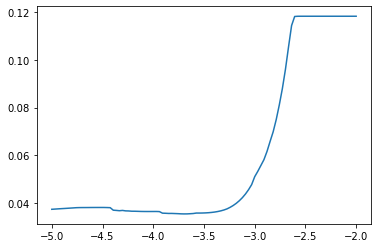

In [118]:
from sklearn.linear_model import Lasso

N = 100
degree = 5
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)


z = FrankeFunction(x_flat, y_flat)
#z = z - np.mean(z)
X = create_X(x_flat, y_flat, degree)
#X = X - np.mean(X)


nlambdas = 100
lambdas = np.logspace(-5, -2, nlambdas)
k = 5
kfold = KFold(n_splits = k)

mse_lasso_bs = np.zeros(nlambdas)
mse_lasso_cv = np.zeros(nlambdas)
bias = np.zeros(nlambdas)
variance = np.zeros(nlambdas)

for i in range(nlambdas):
    lmd = lambdas[i]
    print(lmd)
    # Cross validation
    mse_cv = []
    mse_bs = []
    lassoreg = Lasso(alpha=lmd, normalize = True, tol = 0.1)
    for train_indexes, test_indexes in kfold.split(X):
        X_train_cv = X[train_indexes]
        X_test_cv = X[test_indexes]
        z_train_cv = z[train_indexes]
        z_test_cv = z[test_indexes]

        lassoreg.fit(X_train_cv, z_train_cv)
        z_pred_cv = lassoreg.predict(X_test_cv)
        print(lassoreg.coef_)
        
        mse_cv.append(mean_squared_error(z_test_cv, z_pred_cv))
    mse_lasso_cv[i] = np.mean(mse_cv)
        
plt.plot(np.log10(lambdas), mse_lasso_cv)
plt.show()

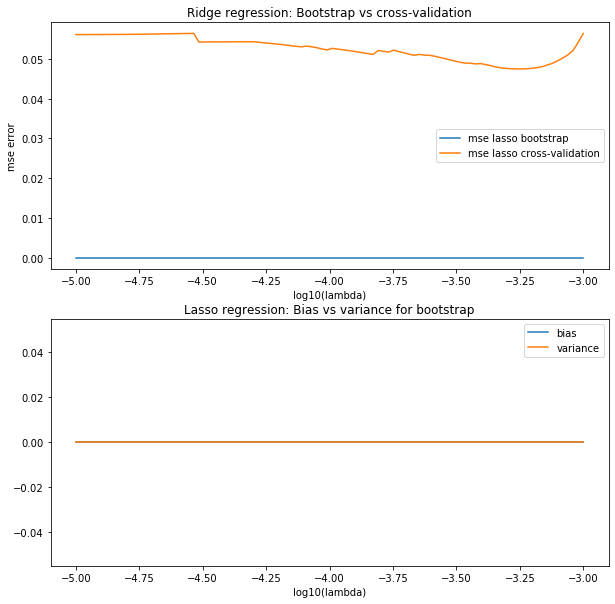

In [20]:
fig,ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(np.log10(lambdas), mse_lasso_bs, label='mse lasso bootstrap')
ax[0].plot(np.log10(lambdas), mse_lasso_cv, label='mse lasso cross-validation')
ax[0].set_xlabel('log10(lambda)')
ax[0].set_ylabel('mse error')
ax[0].legend()
ax[0].set_title('Ridge regression: Bootstrap vs cross-validation')

ax[1].plot(np.log10(lambdas), bias, label='bias')
ax[1].plot(np.log10(lambdas), variance, label='variance')
ax[1].set_xlabel('log10(lambda)')
ax[1].legend()
ax[1].set_title('Lasso regression: Bias vs variance for bootstrap')
plt.show()